In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dropout,Activation
from keras.datasets import mnist 
from keras.optimizers import Adam,SGD,RMSprop
from keras.utils import np_utils
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("c:/Users/HP/Desktop/mnist/", one_hot=True)

In [4]:
f = np.load('d://mnist.npz')
print(type(f))
print(f.files)

<class 'numpy.lib.npyio.NpzFile'>
['x_test', 'x_train', 'y_train', 'y_test']


In [5]:
for i in f.files:
    print(i,f[i].shape,type(f[i]))

x_test (10000, 28, 28) <class 'numpy.ndarray'>
x_train (60000, 28, 28) <class 'numpy.ndarray'>
y_train (60000,) <class 'numpy.ndarray'>
y_test (10000,) <class 'numpy.ndarray'>


In [6]:
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']

In [55]:
y_test.shape

(10000, 10)

In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)


In [8]:
x_train = x_train.astype('float32')
x_test =  x_test.astype('float32')


In [9]:
x_train = x_train/255 
x_test = x_test/255


In [10]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [11]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [12]:
plt.ion()

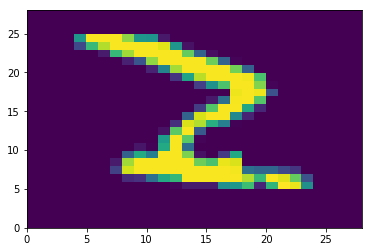

In [13]:
plt.pcolor(x_train[0].reshape(28,28))


In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
y_train = np_utils.to_categorical(y_train)
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [17]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [18]:
y_test = np_utils.to_categorical(y_test)
y_test

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [19]:
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [20]:
print(y_test[:])

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [21]:
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [22]:
model = Sequential()

In [23]:
from keras.layers.core import Dense,Dropout,Activation

In [24]:
model.add(Dense(128,input_shape = (784,)))

In [25]:
model.add(Activation ('sigmoid'))

In [26]:
model.add(Dense(10))

In [27]:
model.layers

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Here in layer one number of parameters are 100480, how this is formed?
we have 784 pixels which is 28*28 for a single image and we have defined total 128 neurons so it is 784*128 and since there are 128 neaurons so we will have 128 biases also, so it will be 784*128+128 which is h = wx+b eqaution and 16512 is like 128*128+128 and 1290 is like 128*10+10 where 10 is second Dense layer neurons.

In [29]:
model.add(Activation('softmax'))

we can have any optimizer like adagradient and stoachstic gradient optimizer, i used sgd here,you can try other also.

In [30]:
sgd = SGD()

In [31]:
model.compile(optimizer=sgd,loss='categorical_crossentropy')

In [32]:
model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 122us/step - loss: 2.0044 - val_loss: 1.7172
Epoch 2/50
60000/60000 [==============================] - 5s 89us/step - loss: 1.5038 - val_loss: 1.2890
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 1.1569 - val_loss: 1.0138
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.9386 - val_loss: 0.8417
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.7995 - val_loss: 0.7288
Epoch 6/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.7059 - val_loss: 0.6511
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.6395 - val_loss: 0.5943
Epoch 8/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.5903 - val_loss: 0.5516
Epoch 9/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.5524 - val_loss: 0.5179
Epoc

In the above process we can lot of things, we set rpoch as 50 so 50 times it will prcoess the samples, how many samples 60000 you can left hand side 60000/60000 and you can see each epoch took how many seconds and loss is how much it differs from actual values that 100-accuracy = loss

In [33]:
score = model.evaluate(x_test,y_test,verbose=1,batch_size=128)
score


10000/10000 [==============================] - 0s 46us/step


0.29115181632041931

In [34]:
a = model.get_weights()

In [35]:
len(a)

4

we passed input values 784 pixels and neurons are 128 in layer1 after softmax activation function the number of weights are 10 which is in dense layer2 as you can see below the required classes are 10 and we have correpsonding weights here.

In [36]:
for i in range(len(a)):
    print(len(a[i]))
    

784
128
128
10


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


we can save model weights and total model also if we want, this helps in reducing the training time again if we want to train in future for same kind of data.

In [38]:
model.save_weights('weights of MNIST DATA',overwrite=False)

[WARNING] weights of MNIST DATA already exists - overwrite? [y/n]n


In [39]:
model.save('model of MNIST DATA')

In [40]:
model.get_weights()

[array([[-0.01095544, -0.04106629, -0.04769368, ..., -0.02254086,
          0.08104219, -0.07354458],
        [-0.00934229, -0.05220272,  0.04934814, ..., -0.05531628,
          0.04720449, -0.01831578],
        [-0.03418957, -0.05006023, -0.02254985, ..., -0.05919138,
         -0.01812091, -0.07387283],
        ..., 
        [ 0.03372027, -0.06750977,  0.04182287, ..., -0.00528961,
          0.006311  ,  0.01676236],
        [ 0.04065843,  0.05157644,  0.01355191, ...,  0.05868988,
         -0.03920125,  0.00607637],
        [-0.05782405, -0.02241317,  0.04209287, ..., -0.02060072,
         -0.06434798, -0.01654685]], dtype=float32),
 array([ 0.02582255, -0.02237135, -0.04541591, -0.01814336,  0.0109027 ,
        -0.04642588, -0.0060183 ,  0.01099695, -0.08118869,  0.01063968,
        -0.07328641, -0.07488114, -0.01094717,  0.0529811 , -0.0269148 ,
        -0.01520439,  0.00910046,  0.00130905, -0.00263578, -0.02850336,
         0.04514586,  0.03155594,  0.02753884, -0.0030693 ,  0.01

In [41]:
len(model.get_weights())

4

In [42]:
len(model.get_weights()[0])

784

In [43]:
len(model.get_weights()[1])

128

In [44]:
len(model.get_weights()[2])

128

In [45]:
len(model.get_weights()[3])

10

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


we can predict the classes for a given data

In [47]:
model.predict_classes(x_test,batch_size=32)

10000/10000 [==============================] - 1s 106us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

we can estimate / predict what is the probablity of a class for a given data

In [48]:
model.predict_proba(x_test)

10000/10000 [==============================] - 1s 89us/step


array([[  1.07453801e-04,   1.11053635e-06,   1.62034223e-04, ...,
          9.96168911e-01,   2.28766203e-05,   1.77923043e-03],
       [  1.93929132e-02,   6.52925286e-04,   7.93924570e-01, ...,
          7.34169760e-07,   7.48457946e-03,   3.22276219e-06],
       [  1.47521578e-05,   9.71576035e-01,   1.07778888e-02, ...,
          5.07422863e-03,   2.97996565e-03,   9.36807774e-04],
       ..., 
       [  3.14539307e-06,   3.42625499e-05,   7.04521954e-05, ...,
          2.59239832e-03,   1.19983312e-02,   3.93913016e-02],
       [  3.17703583e-03,   3.72383650e-03,   8.26828182e-04, ...,
          2.93844147e-04,   3.75050485e-01,   4.91985178e-04],
       [  4.12568537e-04,   1.98531325e-07,   1.27972185e-03, ...,
          1.15531819e-07,   9.73709939e-06,   2.58465298e-06]], dtype=float32)